In [1]:
import numpy as np
import pylab
%matplotlib inline

pylab.rc('xtick', labelsize=14.5) 
pylab.rc('ytick', labelsize=14.5) 
params = {'legend.fontsize': 15, 
          'legend.linewidth': 2} 

pylab.rcParams.update(params) 
text_size_label = 20

In [2]:
def plots( RP=None, R=None, parameters=""):
    
    params = parameters.split(",")
    print params
    dec, bf, freq, st, dt, dnu, = params[0], params[1], params[2], params[3], params[4], params[5]
    beamwidth = ((float(bf)*3e8)/(2.*float(freq)*10**6*13.5))*90./np.pi
    
    pylab.figure(figsize=(15, 6))
    pylab.plot(R['radius'], R['flux'],'r-o',label=r"$R$")
    pylab.plot(RP['radius'], RP['flux'],'b-o',label=r"$RP, BF=%.3f$"%(float(bf)))
    #pylab.plot(R['radius'], (1-R['flux'])*(RP['flux']/R['flux']),'k-o',label=r"$(1-R)P, BF=%.3f$"%(float(bf)))
    pylab.title(r"freq=%.2fMHz, Dec=%ddeg, synthesis time=%dh, $\Delta t$=%.2fs, $\Delta \nu$=%.2fkHz"%(float(freq),
                                                                                                   int(dec), int(st),float(dt),float(dnu)),fontsize=text_size_label)
    pylab.xlabel("Angular distance [deg]", fontsize=text_size_label)
    pylab.ylabel("Flux [Jy]", fontsize=text_size_label)
    pylab.legend()  
    
def plotx (RP=None, R=None, parameters=""):
    params = parameters.split(",")
    dec, bf, freq, st, dt, dnu, = params[0], params[1], params[2], params[3], params[4], params[5]
    beamwidth = ((float(bf)*3e8)/(2.*float(freq)*10**6*13.5))*90./np.pi
    
    pylab.figure(figsize=(15, 6))
    pylab.plot(R['radius'], (1-R['flux'])*(RP['flux']/R['flux']),'k-o',label=r"$(1-R)P, BF=%.3f$"%(float(bf)))
    pylab.title(r"freq=%.2fMHz, Dec=%ddeg, synthesis time=%dh, $\Delta t$=%.2fs, $\Delta \nu$=%.2fkHz"%(float(freq),
                                                                                                   int(dec), int(st),float(dt),float(dnu)),fontsize=text_size_label)
    pylab.xlabel("Angular distance [deg]", fontsize=text_size_label)
    pylab.ylabel("Flux [Jy]", fontsize=text_size_label)
    pylab.legend()

['-30', '1.2195', '900.', '1', '32', '23.5']


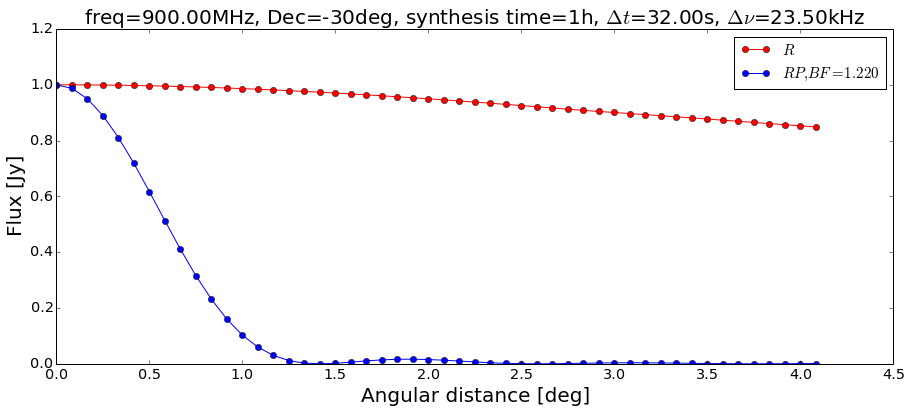

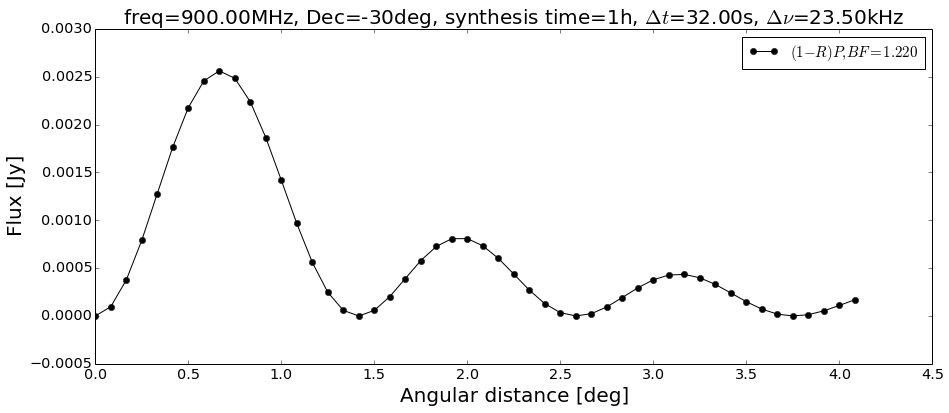

In [3]:

# RP for frequency=900MHz, delta_t=32s, delta_f=23.5kHz, Dec=-30deg, synthesis time=1h, total bandwidth=117.5kHz
RP = np.load("rp_2.439lambada_dec-30_900MHz_int32s_channel32.5kHz-synthesis1h.data")
R = np.load("r_dec-30_900MHz_int32s_channel32.5kHz-synthesis1h.data")
plots(RP,R,"-30,1.2195,900.,1,32,23.5")
plotx(RP,R,"-30,1.2195,900.,1,32,23.5")

['-30', '0.51', '900.', '1', '32', '23.5']


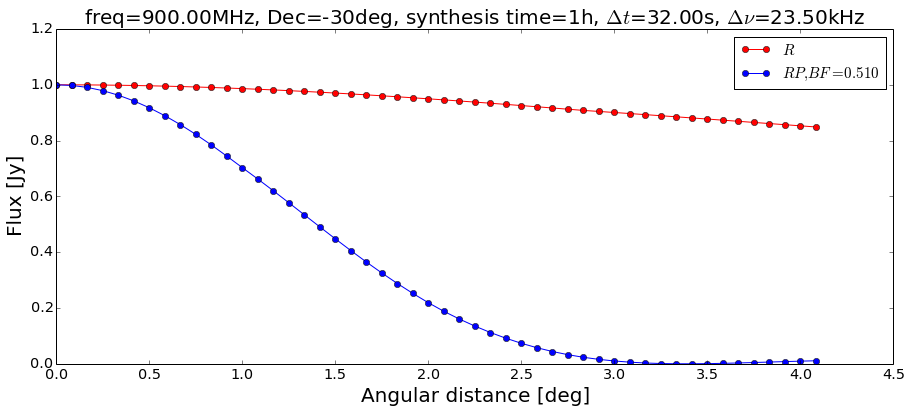

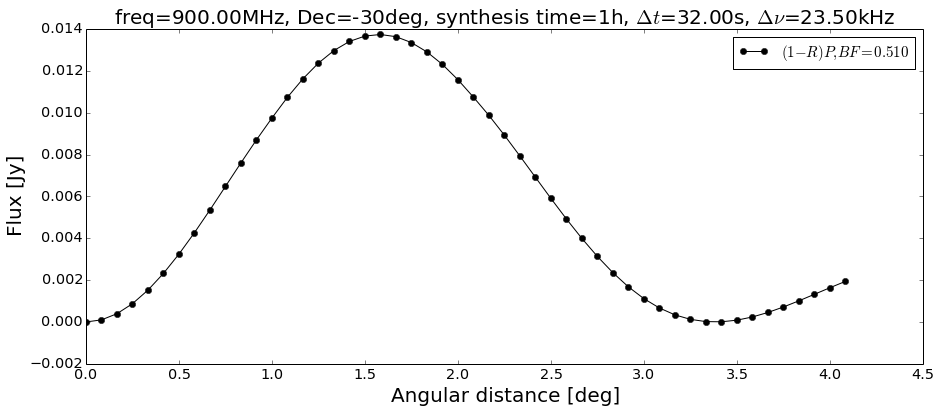

In [4]:
# RP for frequency=900MHz, delta_t=32s, delta_f=23.5kHz, Dec=-30deg, synthesis time=1h, total bandwidth=117.5kHz
RP = np.load("rp_1.02lambada_dec-30_900MHz_int32s_channel32.5kHz-synthesis1h.data")
plots(RP,R,"-30,0.51,900.,1,32,23.5")
plotx(RP,R,"-30,0.51,900.,1,32,23.5")

['-30', '1.2195', '1420.', '1', '32', '23.5']


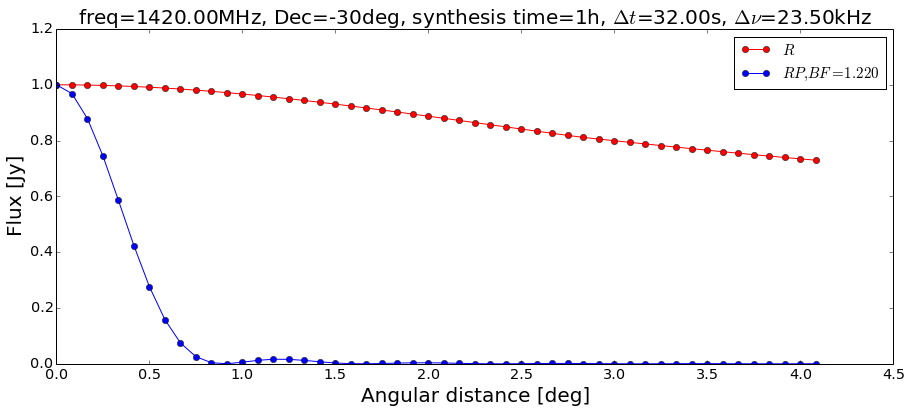

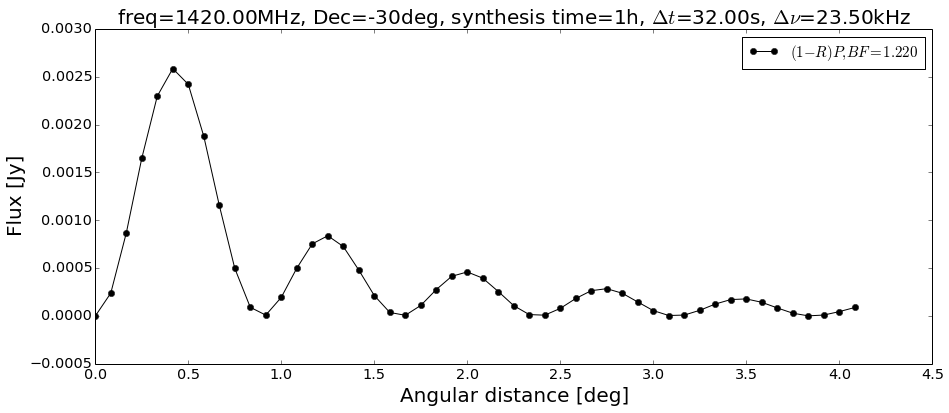

In [5]:
# RP for frequency=1420MHz, delta_t=32s, delta_f=23.5kHz, Dec=-30deg, synthesis time=1h, total bandwidth=117.5kHz
RP = np.load("rp_2.439lambada_dec-30_1420MHz_int32s_channel32.5kHz-synthesis1h.data")
R = np.load("r_dec-30_1420MHz_int32s_channel32.5kHz-synthesis1h.data")
plots(RP,R,"-30,1.2195,1420.,1,32,23.5")
plotx(RP,R,"-30,1.2195,1420.,1,32,23.5")

['-30', '0.51', '1420.', '1', '32', '23.5']


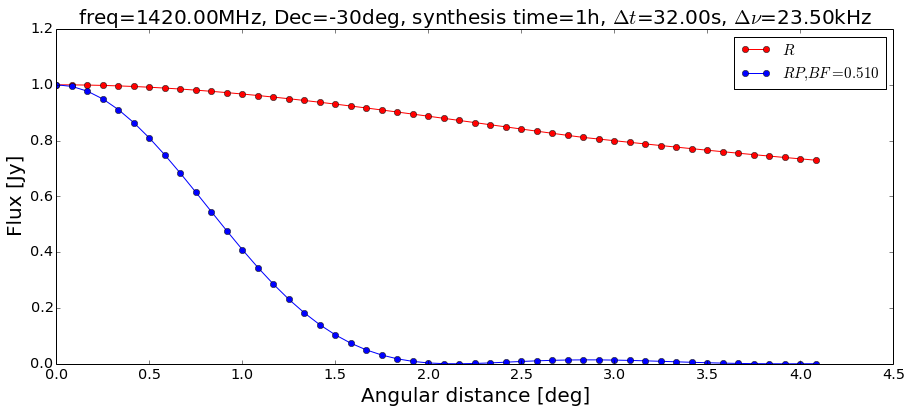

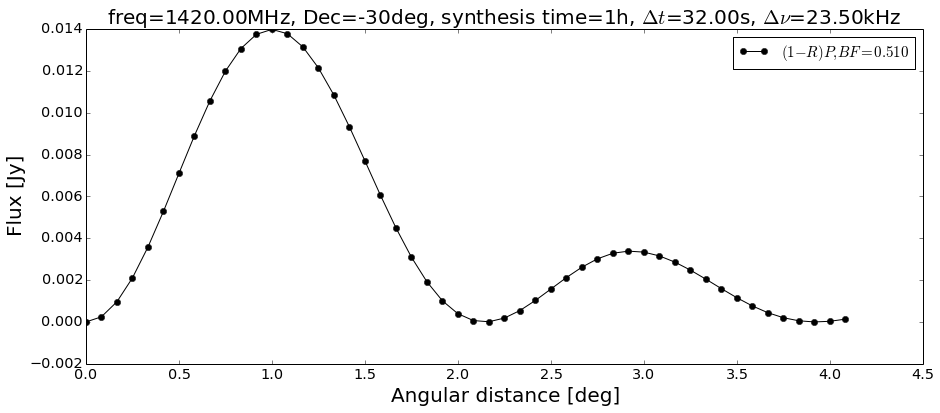

In [6]:
# RP for frequency=1420MHz, delta_t=32s, delta_f=23.5kHz, Dec=-30deg, synthesis time=1h, total bandwidth=117.5kHz
RP = np.load("rp_1.02lambada_dec-30_1420MHz_int32s_channel32.5kHz-synthesis1h.data")
plots(RP,R,"-30,0.51,1420.,1,32,23.5")
plotx(RP,R,"-30,0.51,1420.,1,32,23.5")

['-30', '0.51', '1670.', '1', '32', '23.5']


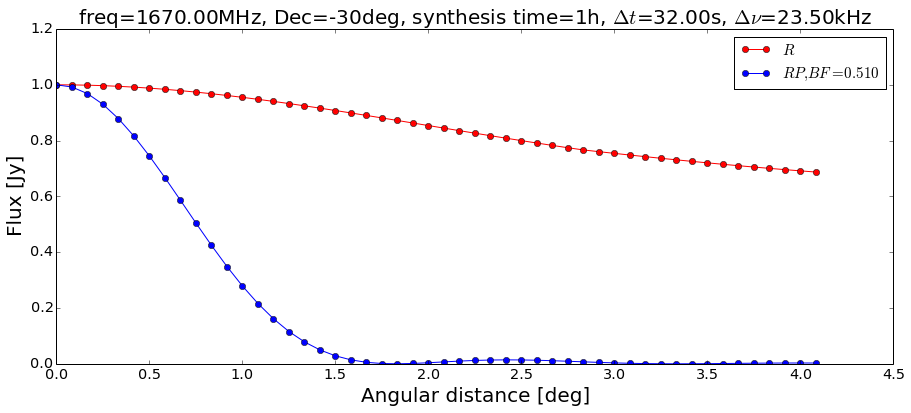

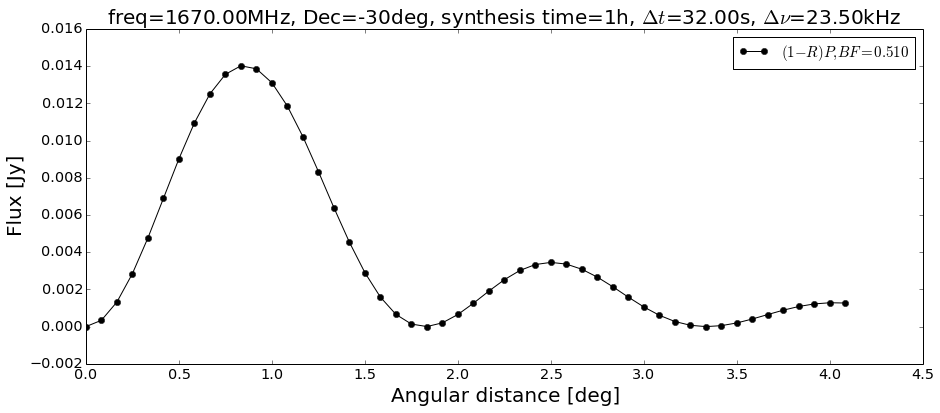

In [7]:
# RP for frequency=1670MHz, delta_t=32s, delta_f=23.5kHz, Dec=-30deg, synthesis time=1h, total bandwidth=117.5kHz
R = np.load("r_dec-30_1670MHz_int32s_channel32.5kHz-synthesis1h.data")
RP = np.load("rp_1.02lambada_dec-30_1670MHz_int32s_channel32.5kHz-synthesis1h.data")
plots(RP,R,"-30,0.51,1670.,1,32,23.5")
plotx(RP,R,"-30,0.51,1670.,1,32,23.5")

['-30', '1.2195', '1670.', '1', '32', '23.5']


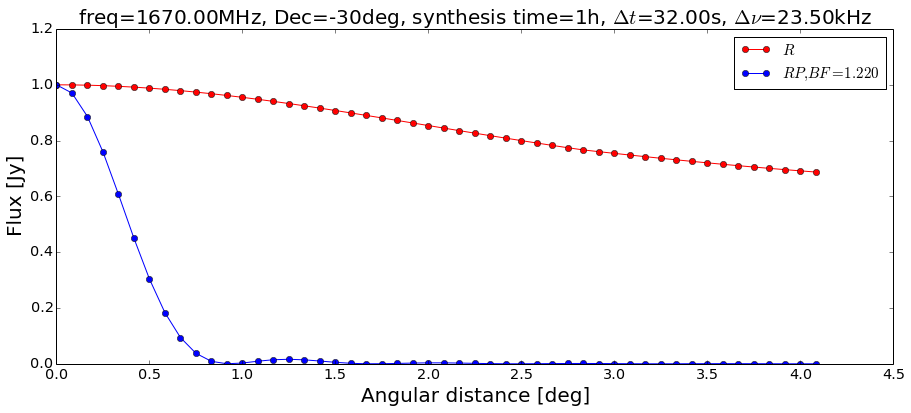

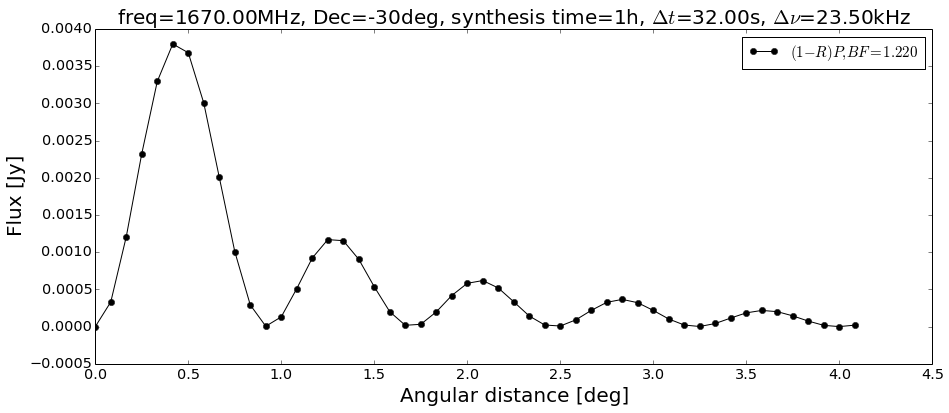

In [9]:
RP = np.load("rp_dec-30_1670MHz_int32s_channel32.5kHz-synthesis1h.data")
plots(RP,R,"-30,1.2195,1670.,1,32,23.5")
plotx(RP,R,"-30,1.2195,1670.,1,32,23.5")